## 2.2 Practical 

Representation Learning

In [4]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Data generation

In [18]:

def f_nonlin(x,N):
    f_xi = np.zeros((N,2))
    f_xi[:,0] = np.sin(x) - x * np.cos(x)
    f_xi[:,1] = np.cos(x) + x * np.sin(x)
    return f_xi

def f_lin(x,A):
    f_in = np.dot(x,A.T)
    return f_in,A

def generateY(N,A): 
    x = np.linspace(0,4*np.pi,N)
    x_non = f_nonlin(x,N)
    Y, A = f_lin(x_non,A)
    return Y,x_non,A


In [19]:
## plot 
def plotting(X_real,Xp):
    ### plot real
    plt.figure()
    plt.scatter(X_real[:,0],X_real[:,1])
    titlen = 'The real $X_{r}$ = [sin(x) - x*cos(x),cos(x) + x*sin(x)] with N =' +str(X_real.shape[0])
    plt.title(titlen)
    plt.show()
    ### plot estimate
    plt.figure()
    plt.scatter(Xp[:,0],Xp[:,1])
    titlen = 'X after Representation Learning with N = ' + str(X_real.shape[0])
    plt.title(titlen)
    plt.show()

In [20]:
N = 200
global Y,Num 
At = np.random.normal(0,1,(10,2))
Y,X_real,A = generateY(N,At)

In [21]:
def f(x,*args):
    x = np.reshape(x,(10,2))
    N = 10
    D = 10
    sigma = 1
    WWs = np.dot(x,x.T)+ (sigma**2)*np.eye(N)
    A   = np.linalg.det(WWs)
    Be  = np.dot(np.dot(Y,np.linalg.inv(WWs)),Y.T)
    B   = (1/2) * np.trace(Be)
    val = (Num*D/2)*np.log(2*np.pi) + (Num/2)*np.log(A) + B
    
    # return the value of the objective at x
    # −ln(P(Y|W)) =ND2ln(2π) +N2ln(|WWT+σ2I|) +12tr(YT(WWT+σ2I)−1Y) 
    return val

def df(x,*args):
    x = np.reshape(x,(10,2))
    N = 10
    D = 2
    sigma = 1
    Wsigma = np.linalg.inv(np.dot(x,x.T)+ (sigma**2)*np.eye(N))
    val = np.empty((N,D))
    for i in range(val.shape[0]):
        for j in range(val.shape[1]):
            J = np.zeros((val.shape[0],val.shape[1]))
            J[i,j] = 1
            dWW = np.dot(J,x.T) + np.dot(x,J.T)
            A   = (Num/2)*np.trace(np.dot(Wsigma,dWW))
        
            Be  = np.dot(np.dot(np.dot(np.dot(Y.T,Y),-Wsigma),dWW),Wsigma)
            B   = (1/2)*np.trace(Be)
            val[i,j]= A + B
    val = np.reshape(val,(20,))
    
    # return the gradient of the objective at x
    # N2tr((WWT+σ2I)−1(JijWT+WJTij))−12tr(Y YT(WWT+σ2I)−1(JijWT+WJijT)(WWT+σ2I)−1)
    return val

### Number of available samples = 200

Optimization terminated successfully.
         Current function value: 3069.162841
         Iterations: 33
         Function evaluations: 64
         Gradient evaluations: 64


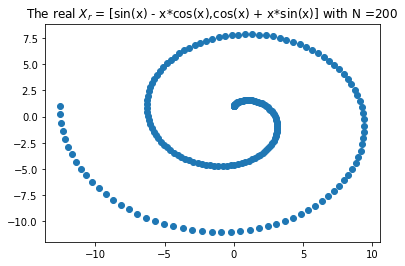

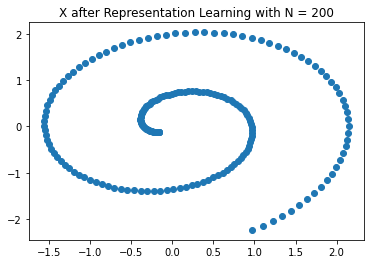

In [22]:
Num  = 200
A  = np.random.randn(20)
A  = np.reshape(A, (20,1))
Ws = opt.fmin_cg(f,A, fprime = df)
W  = np.reshape(Ws,(10,2))
Xp = np.dot(np.dot(Y,W),np.linalg.inv(np.dot(W.T,W)))
plotting(X_real,Xp)



### Number of available samples = 150 

Optimization terminated successfully.
         Current function value: 2301.997002
         Iterations: 40
         Function evaluations: 74
         Gradient evaluations: 74


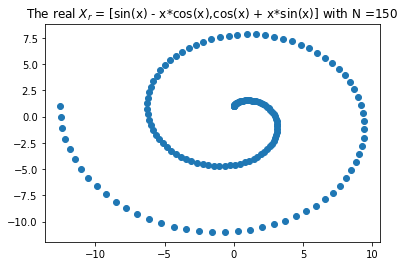

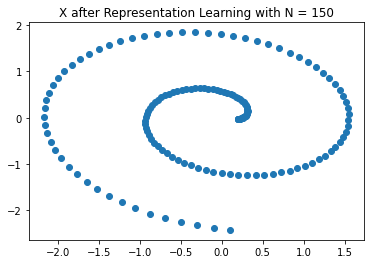

In [23]:

Num = 150
global Y_red     
Y_red,X_red_real,A = Y_generate(Num,At)
Y = Y_red
A  = np.random.randn(20)
A  = np.reshape(A, (20,1))
Ws = opt.fmin_cg(f,A, fprime = df)
W  = np.reshape(Ws,(10,2))
Xp_red = np.dot(np.dot(Y_red,W),np.linalg.inv(np.dot(W.T,W)))
### plot real
plotting(X_red_real,Xp_red)

### Number of available samples = 100

Optimization terminated successfully.
         Current function value: 1534.831192
         Iterations: 33
         Function evaluations: 75
         Gradient evaluations: 75


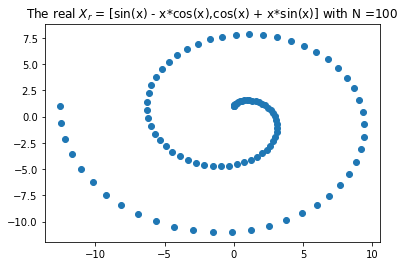

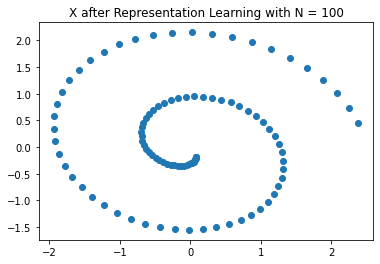

In [24]:
## REDUCE NUMBER OF DATA
Num = 100
global Y_red     
Y_red,X_red_real,A = Y_generate(Num,At)
Y = Y_red
A  = np.random.randn(20)
A  = np.reshape(A, (20,1))
Ws = opt.fmin_cg(f,A, fprime = df)
W  = np.reshape(Ws,(10,2))
Xp_red = np.dot(np.dot(Y_red,W),np.linalg.inv(np.dot(W.T,W)))
### plot real
plotting(X_red_real,Xp_red)

### Number of available samples = 50

Optimization terminated successfully.
         Current function value: 755.483504
         Iterations: 34
         Function evaluations: 66
         Gradient evaluations: 66


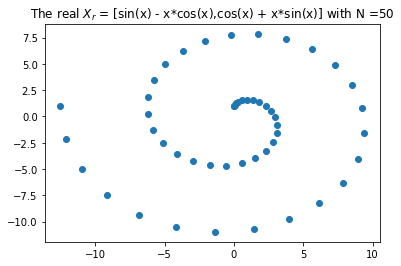

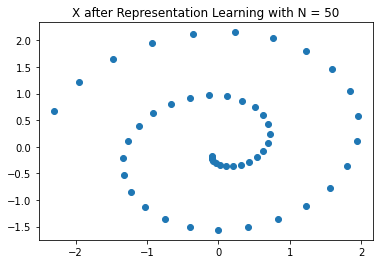

In [16]:
Num = 50
global Y_red     
Y_red,X_red_real,A = Y_generate(Num,At)
Y = Y_red
A  = np.random.randn(20)
A  = np.reshape(A, (20,1))
Ws = opt.fmin_cg(f,A, fprime = df)
W  = np.reshape(Ws,(10,2))
Xp_red = np.dot(np.dot(Y_red,W),np.linalg.inv(np.dot(W.T,W)))
### plot real
plotting(X_red_real,Xp_red)

### Number of available samples = 30

Optimization terminated successfully.
         Current function value: 453.489782
         Iterations: 30
         Function evaluations: 63
         Gradient evaluations: 63


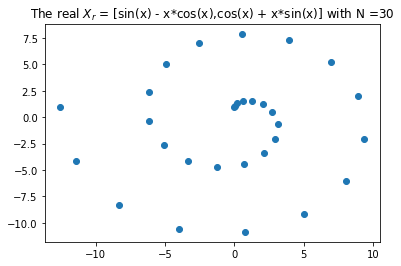

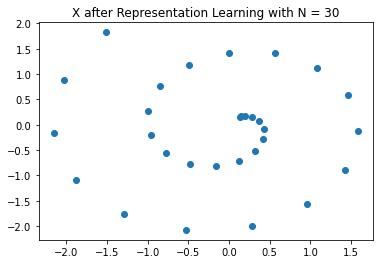

In [17]:
Num = 30
global Y_red     
Y_red,X_red_real,A = Y_generate(Num,At)
Y = Y_red
A  = np.random.randn(20)
A  = np.reshape(A, (20,1))
Ws = opt.fmin_cg(f,A, fprime = df)
W  = np.reshape(Ws,(10,2))
Xp_red = np.dot(np.dot(Y_red,W),np.linalg.inv(np.dot(W.T,W)))
### plot real
plotting(X_red_real,Xp_red)